## Classification Algorithms

### LinearSVC vs LogisticRegression

/Users/kdiri/github/ml_introduction/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/kdiri/github/ml_introduction/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


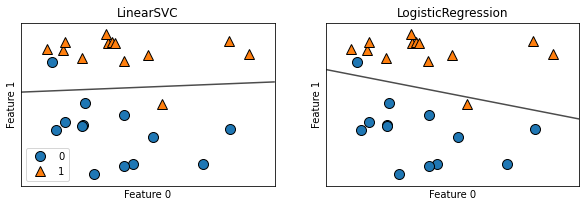

In [1]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")

axes[0].legend()

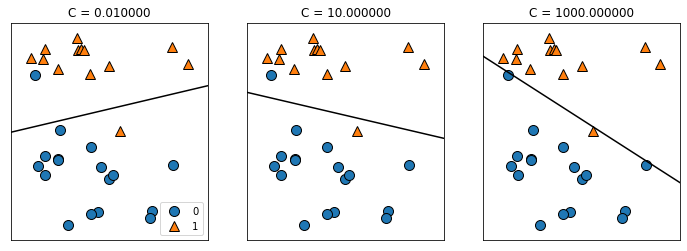

In [2]:
mglearn.plots.plot_linear_svc_regularization()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression().fit(X_train, y_train)

print(f"Training test score: {log_reg.score(X_train, y_train)}")
print(f"Training test score: {log_reg.score(X_test, y_test)}")

Training test score: 0.9553990610328639
Training test score: 0.951048951048951


/Users/kdiri/github/ml_introduction/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
log_reg_100 = LogisticRegression(C=100).fit(X_train, y_train)

print(f"Training test score: {log_reg_100.score(X_train, y_train)}")
print(f"Training test score: {log_reg_100.score(X_test, y_test)}")

Training test score: 0.9530516431924883
Training test score: 0.965034965034965


/Users/kdiri/github/ml_introduction/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
log_reg_001 = LogisticRegression(C=0.001).fit(X_train, y_train)

print(f"Training test score: {log_reg_001.score(X_train, y_train)}")
print(f"Training test score: {log_reg_001.score(X_test, y_test)}")

Training test score: 0.9460093896713615
Training test score: 0.951048951048951


/Users/kdiri/github/ml_introduction/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


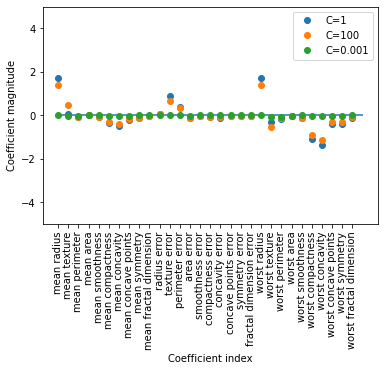

In [6]:
plt.plot(log_reg.coef_.T, "o", label="C=1")
plt.plot(log_reg_100.coef_.T, "o", label="C=100")
plt.plot(log_reg_001.coef_.T, "o", label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.9131455399061033
Test accuracy of l1 logreg with C=0.001: 0.9230769230769231


/Users/kdiri/github/ml_introduction/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of l1 logreg with C=1: 0.960093896713615
Test accuracy of l1 logreg with C=1: 0.958041958041958
Training accuracy of l1 logreg with C=100: 0.9859154929577465
Test accuracy of l1 logreg with C=100: 0.9790209790209791


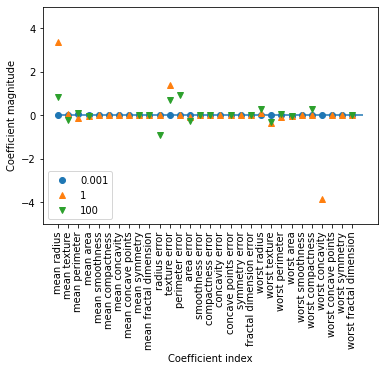

In [7]:
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print(f"Training accuracy of l1 logreg with C={C}: {lr_l1.score(X_train, y_train)}")
    print(f"Test accuracy of l1 logreg with C={C}: {lr_l1.score(X_test, y_test)}")
    plt.plot(lr_l1.coef_.T, marker, label=f"{C}")


plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

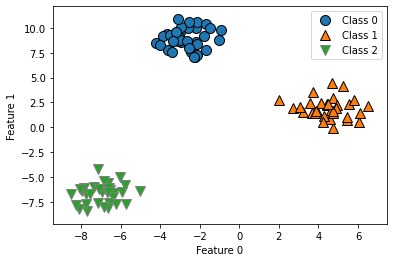

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [9]:
linear_svm = LinearSVC().fit(X, y)
print(f"Coefficient shape: {linear_svm.coef_.shape}")
print(f"Intercept shape: {linear_svm.intercept_.shape}")

Coefficient shape: (3, 2)
Intercept shape: (3,)


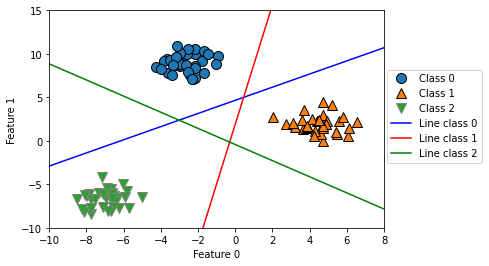

In [10]:
import numpy as np

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))


Text(0, 0.5, 'Feature 1')

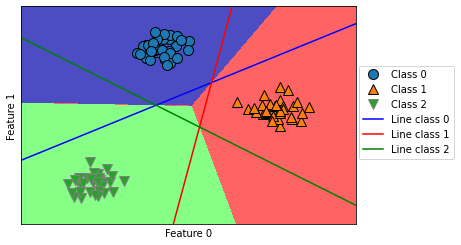

In [11]:

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

In [13]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/Users/kdiri/github/ml_introduction/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
X = np.array([
    [0, 1, 0, 1], 
    [1, 0, 1, 1], 
    [0, 0, 0, 1],
    [1, 0, 1, 0]]) 
y = np.array([0, 1, 0, 1])

In [ ]:
counts: dict = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == labe]